# Методы анализа и обработки изображения

---

ЛР2 - Фильтрация изображений

Студентка гр. РИМ-181226

Бабайлова Маргарита Леонидовна

In [64]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_uint, img_as_ubyte, img_as_float
from numpy import histogram, clip, average
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.transform import integral_image, integrate
from math import exp, pi

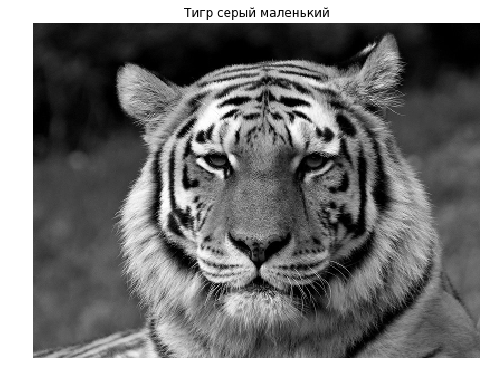

In [65]:
tigerGraySmall = imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(tigerGraySmall)
plt.title('Тигр серый маленький')
plt.show()

Операция свертки

Выполните свертку изображения

\begin{bmatrix} 0 & -8 & -3 & -2\\ 1 & 9 & -8 & 0\\ 9 & -4 & 5 & -9\\ 6 & -4 & 6 & 3 \end{bmatrix}

с ядром:

\begin{bmatrix} 4 & -5 & 4 \\ -6 & -8 & -2\\ 1 & 5 & 5 \end{bmatrix} 

Результат выпишите построчно через пробел.

In [66]:
X = [[0, -8, -3, -2], [1, 9, -8, 0], [9, -4, 5, -9], [6, -4, 6, 3]]
Y = [[4, -5, 4], [-6, -8, 2], [1, 5, 5]]

Box-фильтр

In [67]:
def convolve(X, kernel):
    return convolve2d(X, kernel, mode='valid')

def box_filter(img, filterSize):
    img = integral_image(img)*filterSize
    n = img.shape[0]-filterSize
    m = img.shape[1]-filterSize
    img_box = np.zeros([n,m],np.uint32) 
    for i in range(n): 
        for j in range(m): 
            img_box[i,j]=integrate(img,(i,j),(i+filterSize,j+filterSize)) 
    img_box=np.uint8(img_box//100)
    return img_box

In [68]:
convolve(X, Y)

array([[ 11, -52],
       [130, -23]])

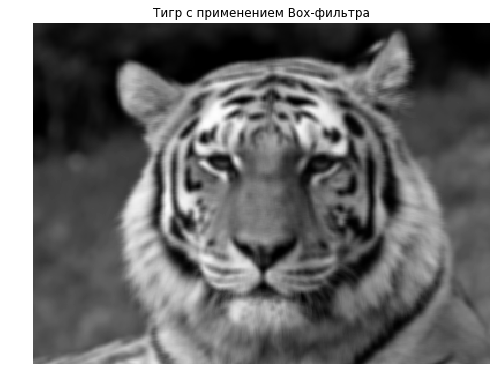

In [69]:
boxFilteredImg = box_filter(tigerGraySmall, 4)
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(boxFilteredImg)
plt.title('Тигр с применением Box-фильтра')
plt.show()

Гауссовский фильтр

In [70]:
def calculate_gaus(A):
    s, x, y = A
    d = 1/(2*pi*s**2)*exp((-x**2-y**2)/(2*s**2))
    return d

In [71]:
calculate_gaus([1,1,1])

0.05854983152431917

In [72]:
def show_gaus_kernel_elements(sigma):
    k = round(6 * sigma + 1)
    n = k//2
    a = np.zeros((k,k))
    d = 0
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            a[i+n, j+n]=calculate_gaus([sigma,i,j])
    d = 1/sum(sum(a))
    an = a*d 
    for i in an:
        for j in i:
            print(round(j,5), end=' ')

In [73]:
show_gaus_kernel_elements(0.33)

0.0001 0.00974 0.0001 0.00974 0.96065 0.00974 0.0001 0.00974 0.0001 

In [74]:
def gaus_blur(img_origin, s, kernel=[]):
    img = img_origin.copy()
    d = 0
    k = round(s * 3 * 2 + 1)
    n= k//2
    a = np.zeros((k,k))
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            a[i+n, j+n]=calculate_gaus([s,i,j])
    d = 1/sum(sum(a))
    an = (a*d)
    an = np.around(an, decimals=5)
    
    arrayList=[]
    for y in range(5):
        temparray = np.copy(img)
        temparray = np.roll(temparray, y-1, axis=0)
        for x in range(5):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x-1, axis=1)*an[y,x]
            arrayList.append(temparray_X)
            
    arrayList=  np.array(arrayList)
    arrayList_sum = np.sum(arrayList, axis=0)
    
    itog = arrayList_sum
    img = clip(itog, 0, 255)
    return img.astype('uint8')

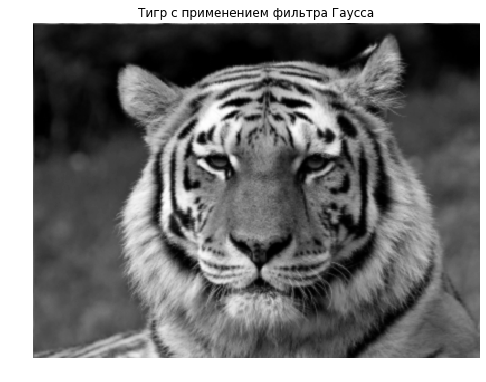

In [75]:
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(gaus_blur(tigerGraySmall, 0.66))
plt.title('Тигр с применением фильтра Гаусса')
plt.show()

Повышение резкости изображения

In [81]:
def sharpening(img):
    res = np.array([[[0] * img.shape[1]] * img.shape[0]], dtype='float')[0]

    kernel = np.array([[-1, -2, -1],
                       [-2, 22, -2],
                       [-1, -2, -1]]) / 10

    for i in range(3, img.shape[0] + 1):
        for j in range(3, img.shape[1] + 1):
            res[i - 3, j - 3] = (img[i-3: i, j-3: j] * kernel).sum()


    res = np.clip(res[: - 2, : - 2], 0, 255).astype('uint8')
    return res

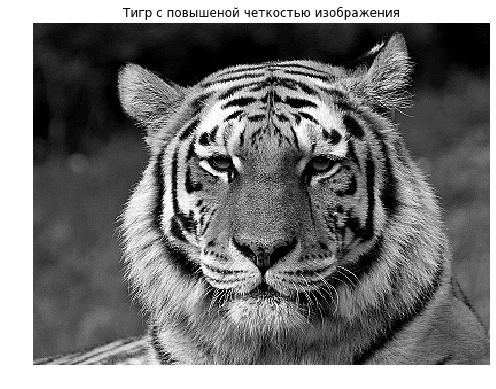

In [82]:
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(sharpening(tigerGraySmall))
plt.title('Тигр с повышеной четкостью изображения')
plt.show()

Медианный фильтр

Реализуйте медианную фильтрацию изображения окном 7×7 пикселей.

In [83]:
def custom_median_filter(img, size):
    res = img.copy()
    rows,cols = img.shape
    half = size//2

    for i in range(half,rows-half):
        for j in range(half,cols-half):
            a = img[i-half:i+half+1,j-half:j+half+1]
            m = np.median(a)
            res[i][j] = m

    res = res[half:rows-half,half:cols-half]
    return res

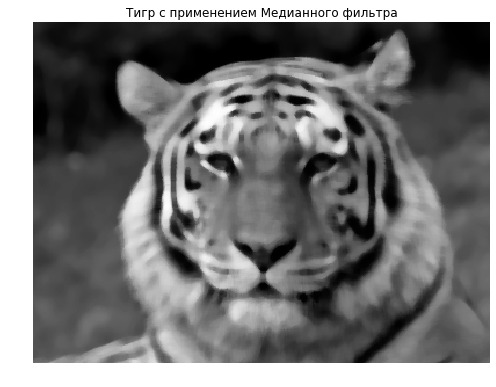

In [84]:
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(custom_median_filter(tigerGraySmall, 7))
plt.title('Тигр с применением Медианного фильтра')
plt.show()

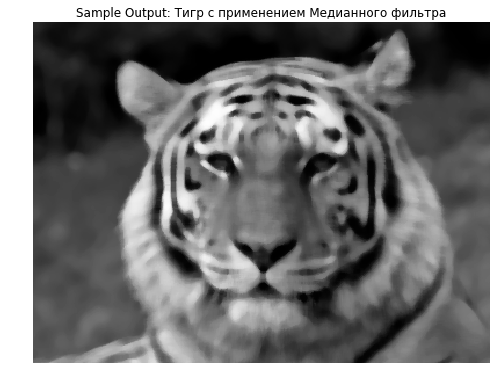

In [85]:
MedianTiger = imread('https://stepik.org/media/attachments/lesson/61041/median-tiger.png')
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(MedianTiger)
plt.title('Sample Output: Тигр с применением Медианного фильтра')
plt.show()